## Preprocesamiento y EDA

In [1]:
!pip install pyarrow

You should consider upgrading via the 'C:\Users\bebia\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
application_train = pd.read_parquet("data/application_train.parquet",engine="pyarrow")
credit_card_balance = pd.read_parquet("data/credit_card_balance.parquet",engine="pyarrow")
installments_payments =  pd.read_parquet("data/installments_payments.parquet",engine="pyarrow")

### Analisis de Application Train 

In [19]:
## Revisar tipo de variables
application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

AttributeError: 'NoneType' object has no attribute 'columns'

In [24]:
## Cantidad de variables por tipo 
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [22]:
## Variable a predecir
application_train.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [23]:
## Describe de todas las variables
pd.set_option('display.max_columns', None)
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [29]:
## Valores nulos
(application_train.isnull().sum()/len(application_train)).sort_values(ascending=False)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 122, dtype: float64

In [30]:
## Funcion que filtra las columnas que tienen cierto porcentaje de nulos
def columns_without_many_nulls(data,th):
    good_columns = []
    for i in range(len(data)):
        if data.iloc[i] < th:
            good_columns.append(data.index[i])
    print(f"Se eligieron {len(good_columns)} de {len(data)} columnas iniciales")
    return good_columns

In [31]:
null_ratio_by_columns = (application_train.isnull().sum()/len(application_train))
good_columns = columns_without_many_nulls(null_ratio_by_columns,0.4)

Se eligieron 73 de 122 columnas iniciales


In [32]:
df = application_train[good_columns]

In [33]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
#df.to_csv("data/training_ds.csv",index=False)

In [35]:
## Analicemos las variables object (categoricas)
object_variables = [c for c in df.columns if df[c].dtype == "object" ]

In [36]:
object_variables

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [41]:
## Chequear cardinalidad
## Este diccionario nos muestra por cada feature
## cuantos valores unicos tiene y el porcentaje de cada uno
obj_variables_cardinality = {}
for i in df[object_variables].columns:
    obj_variables_cardinality[i] = (df[i].unique().tolist(),np.around(df[i].value_counts(normalize=True).values,2))

In [42]:
obj_variables_cardinality

{'NAME_CONTRACT_TYPE': (['Cash loans', 'Revolving loans'], array([0.9, 0.1])),
 'CODE_GENDER': (['M', 'F', 'XNA'], array([0.66, 0.34, 0.  ])),
 'FLAG_OWN_CAR': (['N', 'Y'], array([0.66, 0.34])),
 'FLAG_OWN_REALTY': (['Y', 'N'], array([0.69, 0.31])),
 'NAME_TYPE_SUITE': (['Unaccompanied',
   'Family',
   'Spouse, partner',
   'Children',
   'Other_A',
   None,
   'Other_B',
   'Group of people'],
  array([0.81, 0.13, 0.04, 0.01, 0.01, 0.  , 0.  ])),
 'NAME_INCOME_TYPE': (['Working',
   'State servant',
   'Commercial associate',
   'Pensioner',
   'Unemployed',
   'Student',
   'Businessman',
   'Maternity leave'],
  array([0.52, 0.23, 0.18, 0.07, 0.  , 0.  , 0.  , 0.  ])),
 'NAME_EDUCATION_TYPE': (['Secondary / secondary special',
   'Higher education',
   'Incomplete higher',
   'Lower secondary',
   'Academic degree'],
  array([0.71, 0.24, 0.03, 0.01, 0.  ])),
 'NAME_FAMILY_STATUS': (['Single / not married',
   'Married',
   'Civil marriage',
   'Widow',
   'Separated',
   'Unknown']

## Features vs Target - Visualizaciones

In [65]:
## Funcion para usar porcentajes en los countplots de seaborn
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

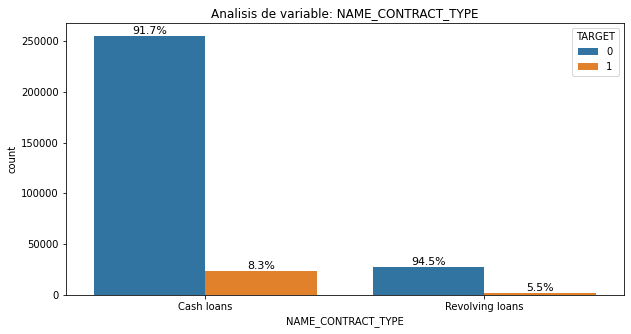

NAME_CONTRACT_TYPE
Cash loans         23221
Revolving loans     1604
Name: TARGET, dtype: int64


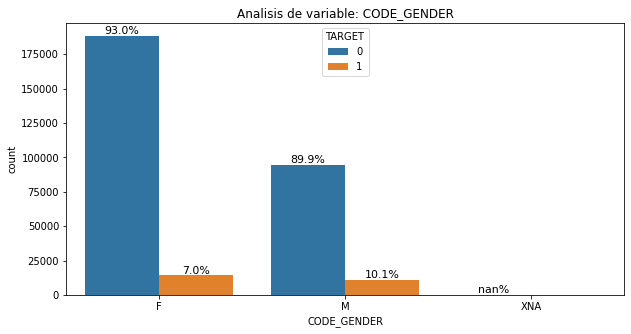

CODE_GENDER
F      14170
M      10655
XNA        0
Name: TARGET, dtype: int64


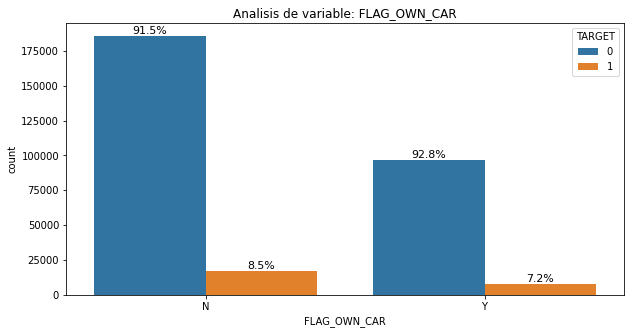

FLAG_OWN_CAR
N    17249
Y     7576
Name: TARGET, dtype: int64


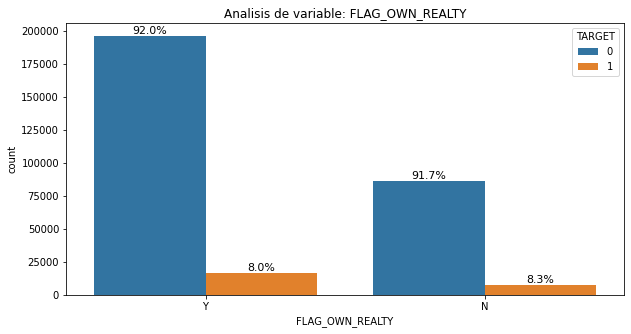

FLAG_OWN_REALTY
Y    16983
N     7842
Name: TARGET, dtype: int64


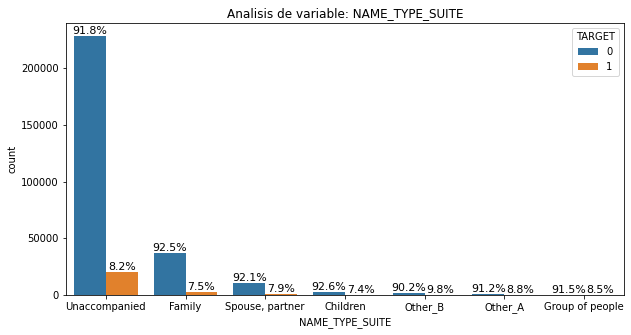

NAME_TYPE_SUITE
Unaccompanied      20337
Family              3009
Spouse, partner      895
Children             241
Other_B              174
Other_A               76
Group of people       23
Name: TARGET, dtype: int64


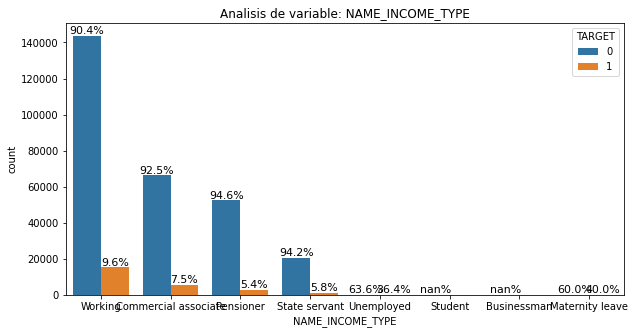

NAME_INCOME_TYPE
Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Businessman                 0
Student                     0
Name: TARGET, dtype: int64


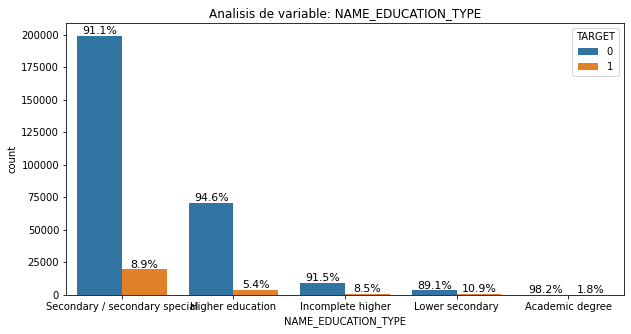

NAME_EDUCATION_TYPE
Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: TARGET, dtype: int64


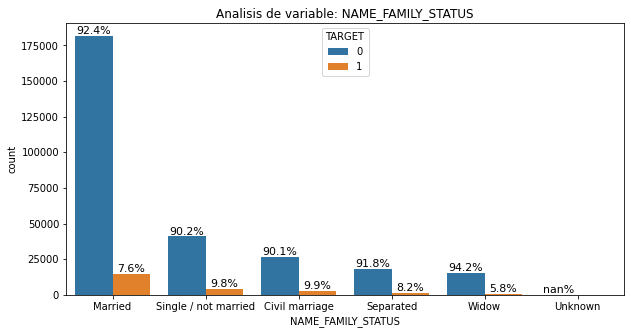

NAME_FAMILY_STATUS
Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Unknown                     0
Name: TARGET, dtype: int64


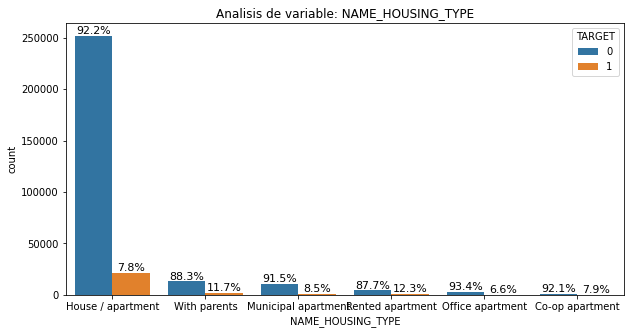

NAME_HOUSING_TYPE
House / apartment      21272
With parents            1736
Municipal apartment      955
Rented apartment         601
Office apartment         172
Co-op apartment           89
Name: TARGET, dtype: int64


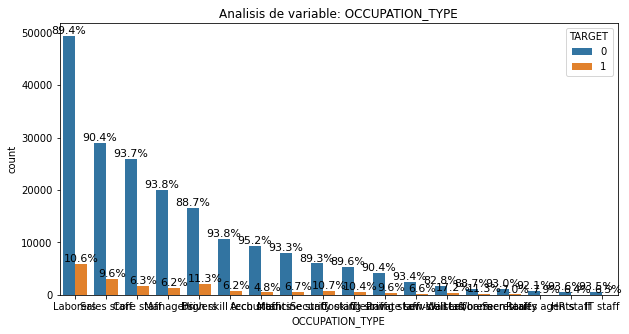

OCCUPATION_TYPE
Laborers                 5838
Sales staff              3092
Drivers                  2107
Core staff               1738
Managers                 1328
Security staff            722
High skill tech staff     701
Cooking staff             621
Medicine staff            572
Accountants               474
Cleaning staff            447
Low-skill Laborers        359
Private service staff     175
Waiters/barmen staff      152
Secretaries                92
Realty agents              59
HR staff                   36
IT staff                   34
Name: TARGET, dtype: int64


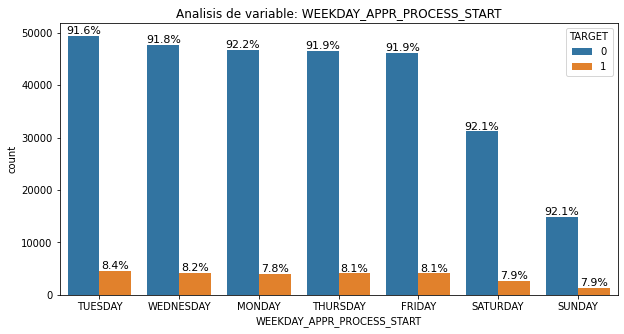

WEEKDAY_APPR_PROCESS_START
TUESDAY      4501
WEDNESDAY    4238
FRIDAY       4101
THURSDAY     4098
MONDAY       3934
SATURDAY     2670
SUNDAY       1283
Name: TARGET, dtype: int64


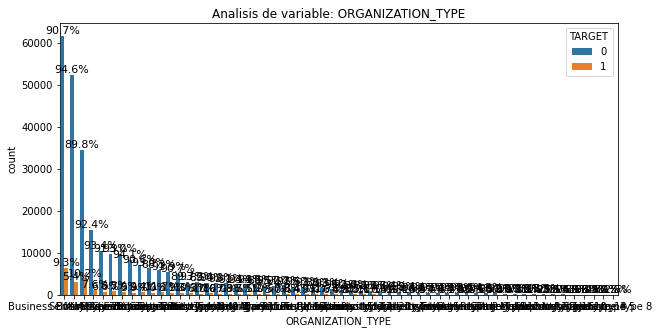

ORGANIZATION_TYPE
Business Entity Type 3    6323
Self-employed             3908
XNA                       2990
Other                     1275
Business Entity Type 2     900
Construction               785
Trade: type 7              740
Medicine                   737
Government                 726
School                     526
Transport: type 4          501
Business Entity Type 1     487
Kindergarten               484
Trade: type 3              361
Industry: type 3           348
Security                   324
Agriculture                257
Housing                    235
Industry: type 11          234
Industry: type 9           225
Restaurant                 212
Transport: type 3          187
Postal                     182
Transport: type 2          172
Military                   135
Trade: type 2              133
Bank                       130
Police                     117
Industry: type 1           115
Industry: type 7           105
Services                   104
Security Ministries  

In [72]:
## Visualizacion Categoricas vs Target
for c in object_variables:
    plt.figure(figsize=(10,5))
    ax3 = sns.countplot(x=c,hue="TARGET",data=df,order=df[c].value_counts().index)
    percentage_above_bar_relative_to_xgroup(ax3)
    plt.title(f"Analisis de variable: {c}")
    plt.show()
    print(df.groupby(c)["TARGET"].sum().sort_values(ascending=False))

In [ ]:
## Analisis de variables numericas
sns.ecdfplot(data=penguins, x="bill_length_mm", hue="species")

In [77]:
numerical_columns = df[df.columns.difference(object_variables)]
print(numerical_columns)

        AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
0           24700.5    406597.5         351000.0          202500.0   
1           35698.5   1293502.5        1129500.0          270000.0   
2            6750.0    135000.0         135000.0           67500.0   
3           29686.5    312682.5         297000.0          135000.0   
4           21865.5    513000.0         513000.0          121500.0   
...             ...         ...              ...               ...   
307506      27558.0    254700.0         225000.0          157500.0   
307507      12001.5    269550.0         225000.0           72000.0   
307508      29979.0    677664.0         585000.0          153000.0   
307509      20205.0    370107.0         319500.0          171000.0   
307510      49117.5    675000.0         675000.0          157500.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                             0.0                         0.0   
1                            

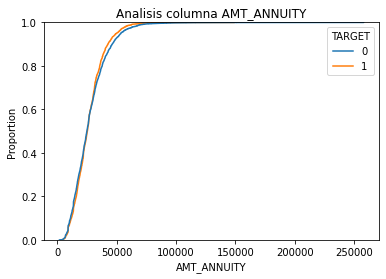

           count          mean           std     min      25%      50%  \
TARGET                                                                   
0       282674.0  27163.623349  14658.307178  1615.5  16456.5  24876.0   
1        24825.0  26481.744290  12450.676999  2722.5  17361.0  25263.0   

            75%       max  
TARGET                     
0       34749.0  258025.5  
1       32976.0  149211.0  


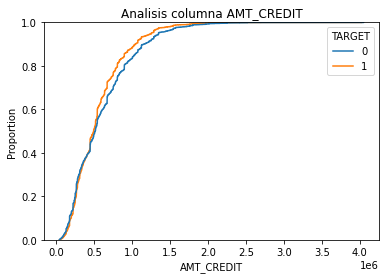

           count           mean            std      min       25%       50%  \
TARGET                                                                        
0       282686.0  602648.282002  406845.907710  45000.0  270000.0  517788.0   
1        24825.0  557778.527674  346433.235646  45000.0  284400.0  497520.0   

             75%        max  
TARGET                       
0       810000.0  4050000.0  
1       733315.5  4027680.0  


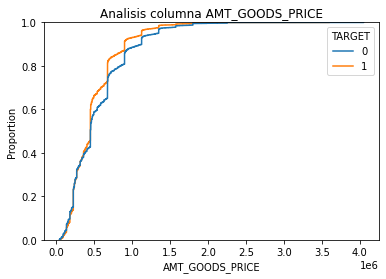

           count           mean            std      min       25%       50%  \
TARGET                                                                        
0       282429.0  542736.795003  373785.493534  40500.0  238500.0  450000.0   
1        24804.0  488972.412554  311636.495297  45000.0  238500.0  450000.0   

             75%        max  
TARGET                       
0       688500.0  4050000.0  
1       675000.0  3600000.0  


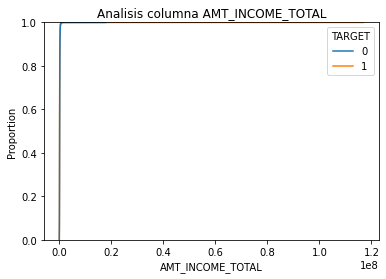

           count           mean            std      min       25%       50%  \
TARGET                                                                        
0       282686.0  169077.722266  110476.268524  25650.0  112500.0  148500.0   
1        24825.0  165611.760906  746676.959440  25650.0  112500.0  135000.0   

             75%          max  
TARGET                         
0       202500.0   18000090.0  
1       202500.0  117000000.0  


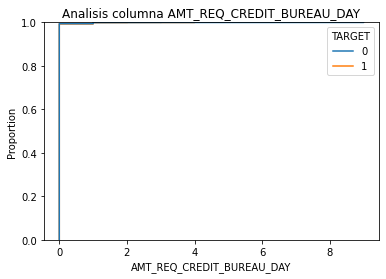

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       245459.0  0.006914  0.111091  0.0  0.0  0.0  0.0  9.0
1        20533.0  0.008036  0.106682  0.0  0.0  0.0  0.0  4.0


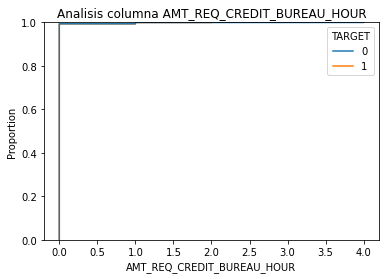

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       245459.0  0.006380  0.083759  0.0  0.0  0.0  0.0  4.0
1        20533.0  0.006672  0.084926  0.0  0.0  0.0  0.0  2.0


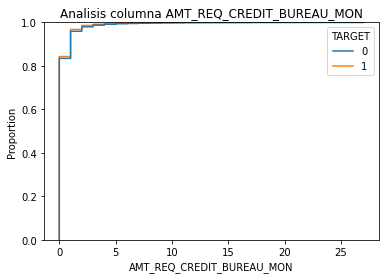

           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       245459.0  0.270697  0.928799  0.0  0.0  0.0  0.0  27.0
1        20533.0  0.227926  0.745116  0.0  0.0  0.0  0.0  17.0


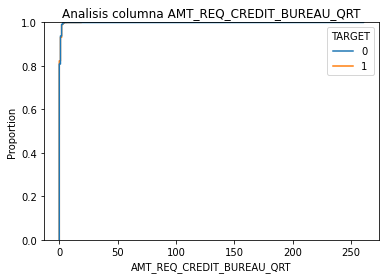

           count      mean       std  min  25%  50%  75%    max
TARGET                                                         
0       245459.0  0.265939  0.805355  0.0  0.0  0.0  0.0  261.0
1        20533.0  0.259923  0.643789  0.0  0.0  0.0  0.0   19.0


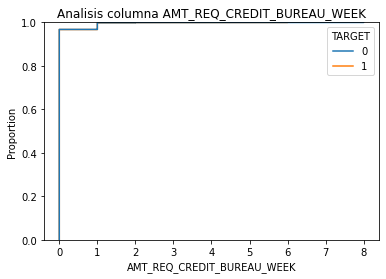

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       245459.0  0.034315  0.204747  0.0  0.0  0.0  0.0  8.0
1        20533.0  0.034919  0.203941  0.0  0.0  0.0  0.0  6.0


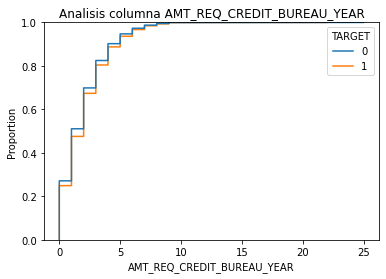

           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       245459.0  1.889199  1.863376  0.0  0.0  1.0  3.0  25.0
1        20533.0  2.028783  1.934063  0.0  1.0  2.0  3.0  22.0


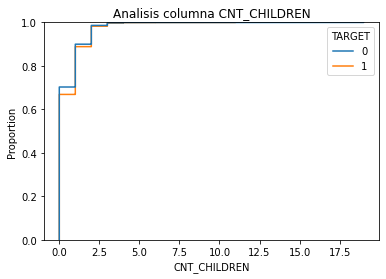

           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       282686.0  0.412946  0.718843  0.0  0.0  0.0  1.0  19.0
1        24825.0  0.463807  0.756903  0.0  0.0  0.0  1.0  11.0


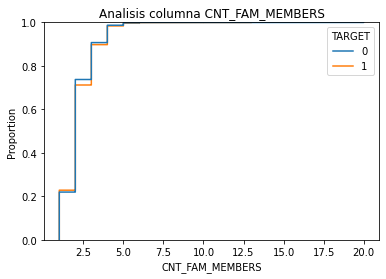

           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       282684.0  2.150154  0.906984  1.0  2.0  2.0  3.0  20.0
1        24825.0  2.181269  0.951327  1.0  2.0  2.0  3.0  13.0


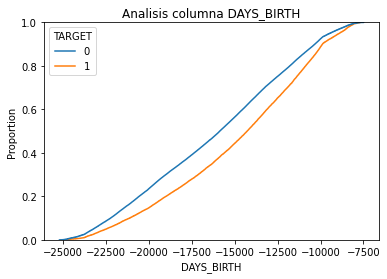

           count          mean          std      min       25%      50%  \
TARGET                                                                    
0       282686.0 -16138.176397  4364.200856 -25229.0 -19793.75 -15877.0   
1        24825.0 -14884.828077  4192.844583 -25168.0 -18037.00 -14282.0   

            75%     max  
TARGET                   
0      -12536.0 -7489.0  
1      -11396.0 -7678.0  


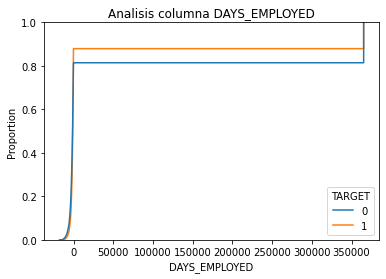

           count          mean            std      min     25%     50%    75%  \
TARGET                                                                          
0       282686.0  65696.146123  142877.810161 -17912.0 -2813.0 -1235.0 -278.0   
1        24825.0  42394.675448  119484.634253 -16069.0 -2156.0 -1034.0 -379.0   

             max  
TARGET            
0       365243.0  
1       365243.0  


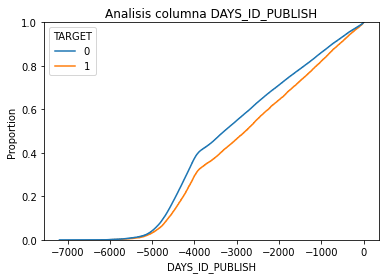

           count         mean          std     min     25%     50%     75%  \
TARGET                                                                       
0       282686.0 -3017.219788  1506.614090 -7197.0 -4313.0 -3295.0 -1755.0   
1        24825.0 -2732.099617  1516.975313 -6207.0 -4119.0 -2797.0 -1392.0   

        max  
TARGET       
0       0.0  
1       0.0  


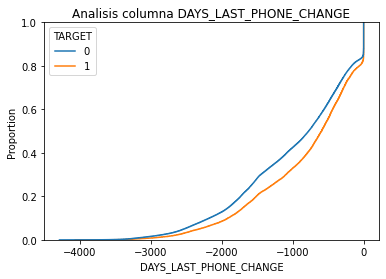

           count        mean         std     min     25%    50%    75%  max
TARGET                                                                     
0       282685.0 -976.388294  831.210739 -4292.0 -1586.0 -776.0 -281.0  0.0
1        24825.0 -808.796818  758.090713 -4070.0 -1301.0 -594.0 -194.0  0.0


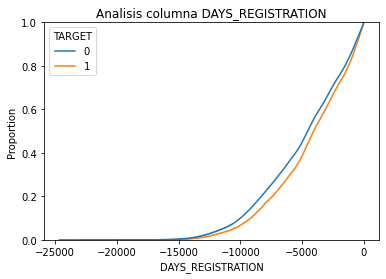

           count         mean          std      min     25%     50%     75%  \
TARGET                                                                        
0       282686.0 -5029.941065  3538.464478 -24672.0 -7550.0 -4544.0 -2045.0   
1        24825.0 -4487.127009  3299.650241 -22928.0 -6646.0 -4056.0 -1671.0   

        max  
TARGET       
0       0.0  
1       0.0  


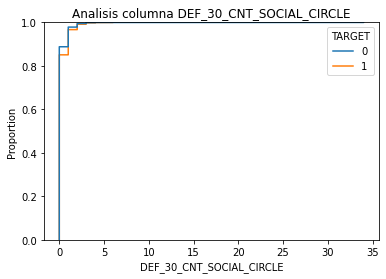

           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       281701.0  0.139148  0.439768  0.0  0.0  0.0  0.0  34.0
1        24789.0  0.191980  0.516524  0.0  0.0  0.0  0.0   6.0


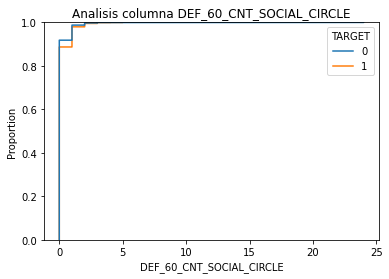

           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       281701.0  0.096688  0.355771  0.0  0.0  0.0  0.0  24.0
1        24789.0  0.138247  0.427645  0.0  0.0  0.0  0.0   5.0


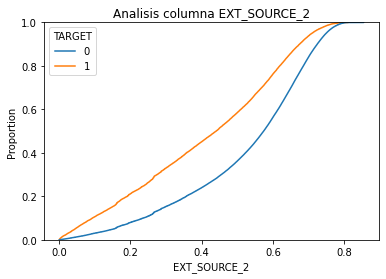

           count      mean       std           min       25%       50%  \
TARGET                                                                   
0       282078.0  0.523479  0.186277  8.173617e-08  0.409787  0.573905   
1        24773.0  0.410935  0.213107  5.002109e-06  0.238568  0.440381   

             75%      max  
TARGET                     
0       0.667705  0.85500  
1       0.594190  0.81187  


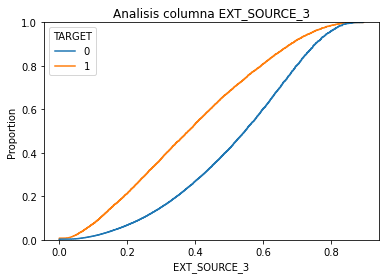

           count      mean       std       min       25%       50%       75%  \
TARGET                                                                         
0       227398.0  0.520969  0.190465  0.000527  0.385915  0.546023  0.673830   
1        19148.0  0.390717  0.205810  0.000527  0.223831  0.379100  0.553165   

             max  
TARGET            
0       0.893976  
1       0.896010  


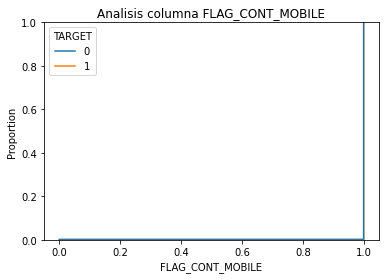

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.998129  0.043219  0.0  1.0  1.0  1.0  1.0
1        24825.0  0.998187  0.042538  0.0  1.0  1.0  1.0  1.0


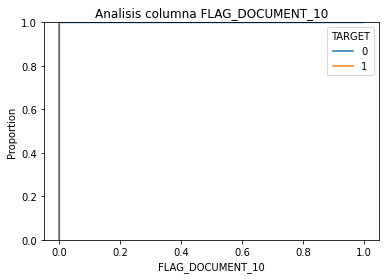

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.000025  0.004976  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


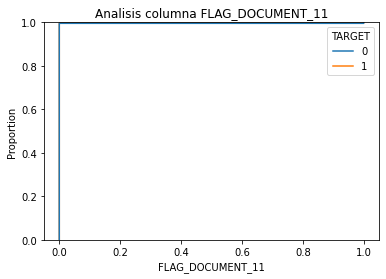

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.003990  0.063043  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.003021  0.054883  0.0  0.0  0.0  0.0  1.0


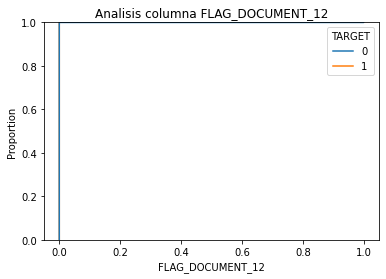

           count      mean      std  min  25%  50%  75%  max
TARGET                                                      
0       282686.0  0.000007  0.00266  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0


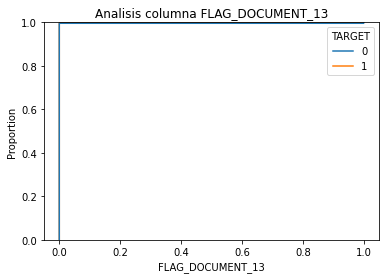

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.003729  0.060948  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.001208  0.034743  0.0  0.0  0.0  0.0  1.0


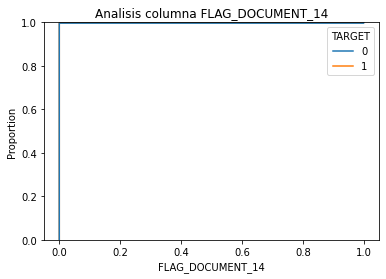

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.003088  0.055486  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.001208  0.034743  0.0  0.0  0.0  0.0  1.0


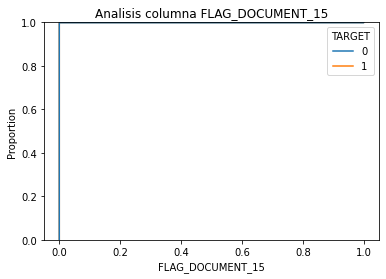

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.001277  0.035713  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.000443  0.021046  0.0  0.0  0.0  0.0  1.0


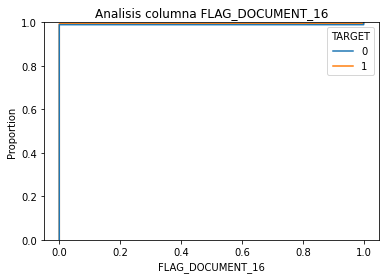

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.010269  0.100816  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.006042  0.077499  0.0  0.0  0.0  0.0  1.0


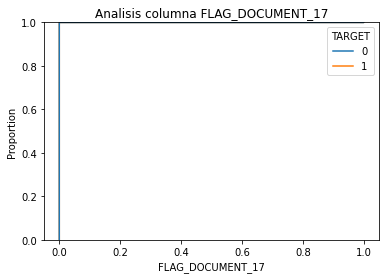

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.000283  0.016820  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.000081  0.008976  0.0  0.0  0.0  0.0  1.0


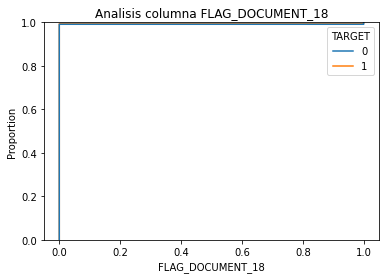

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.008341  0.090950  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.005720  0.075416  0.0  0.0  0.0  0.0  1.0


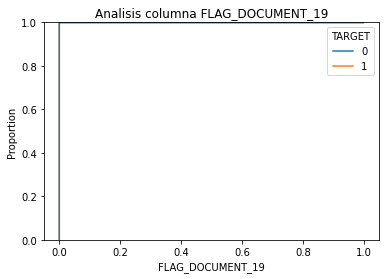

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.000605  0.024588  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.000483  0.021981  0.0  0.0  0.0  0.0  1.0


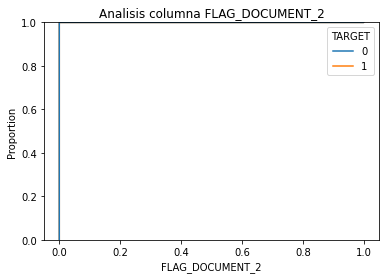

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.000032  0.005642  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.000161  0.012693  0.0  0.0  0.0  0.0  1.0


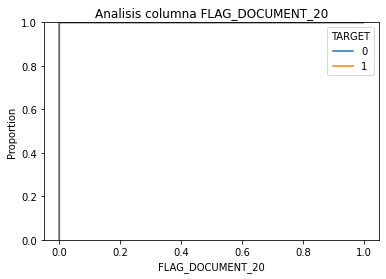

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.000506  0.022486  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.000524  0.022878  0.0  0.0  0.0  0.0  1.0


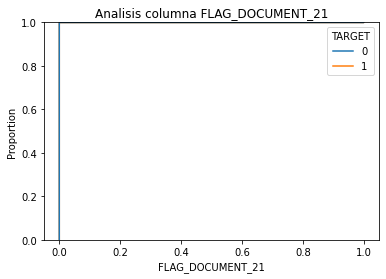

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.000315  0.017741  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.000564  0.023741  0.0  0.0  0.0  0.0  1.0


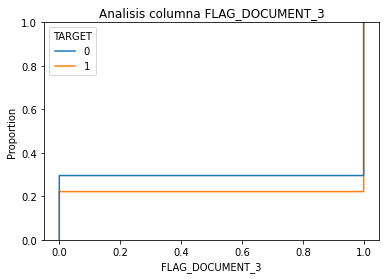

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.704060  0.456465  0.0  0.0  1.0  1.0  1.0
1        24825.0  0.777925  0.415649  0.0  1.0  1.0  1.0  1.0


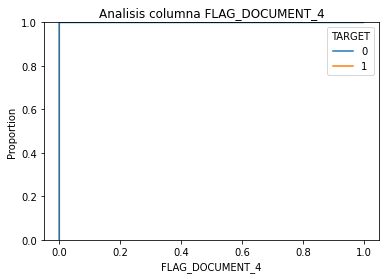

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.000088  0.009404  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


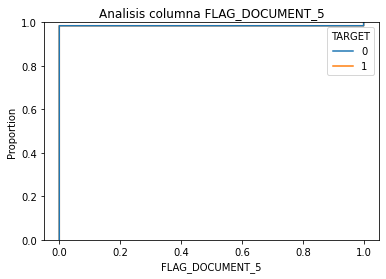

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.015126  0.122056  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.014985  0.121495  0.0  0.0  0.0  0.0  1.0


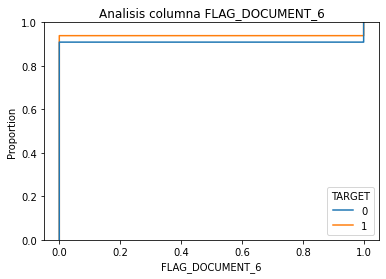

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.090457  0.286836  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.060705  0.238793  0.0  0.0  0.0  0.0  1.0


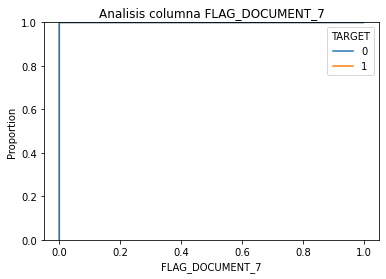

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.000198  0.014073  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.000121  0.010993  0.0  0.0  0.0  0.0  1.0


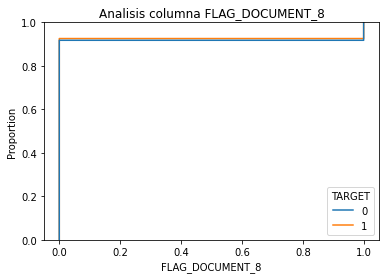

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.082027  0.274407  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.073958  0.261707  0.0  0.0  0.0  0.0  1.0


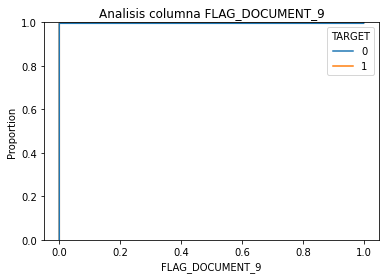

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.003976  0.062931  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.002981  0.054517  0.0  0.0  0.0  0.0  1.0


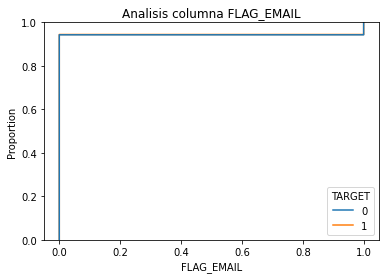

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.056840  0.231538  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.055347  0.228662  0.0  0.0  0.0  0.0  1.0


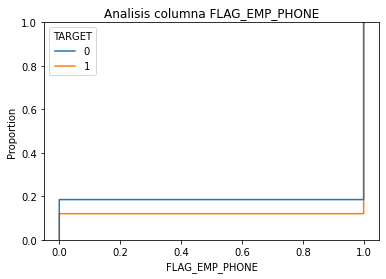

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.814653  0.388579  0.0  1.0  1.0  1.0  1.0
1        24825.0  0.879517  0.325532  0.0  1.0  1.0  1.0  1.0


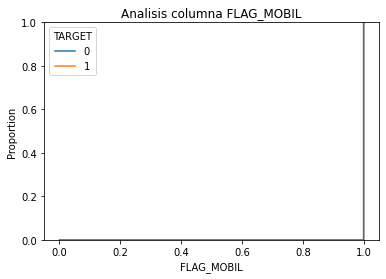

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.999996  0.001881  0.0  1.0  1.0  1.0  1.0
1        24825.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0


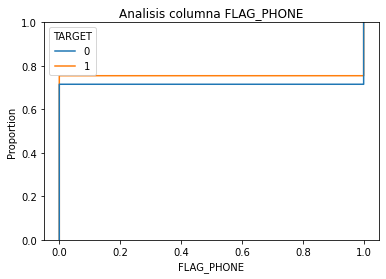

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.284238  0.451051  0.0  0.0  0.0  1.0  1.0
1        24825.0  0.244955  0.430069  0.0  0.0  0.0  0.0  1.0


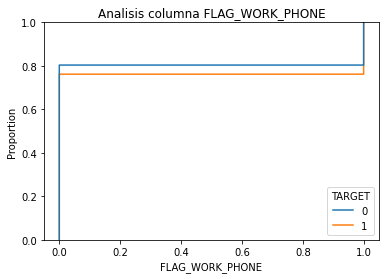

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.195991  0.396963  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.237825  0.425760  0.0  0.0  0.0  0.0  1.0


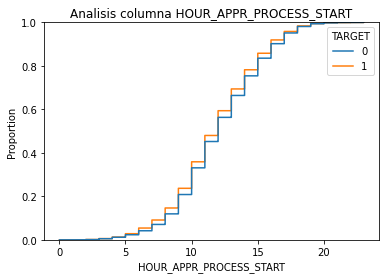

           count       mean       std  min   25%   50%   75%   max
TARGET                                                            
0       282686.0  12.086807  3.263173  0.0  10.0  12.0  14.0  23.0
1        24825.0  11.797100  3.284299  0.0  10.0  12.0  14.0  23.0


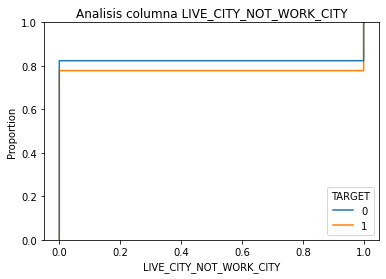

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.175856  0.380698  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.221672  0.415380  0.0  0.0  0.0  0.0  1.0


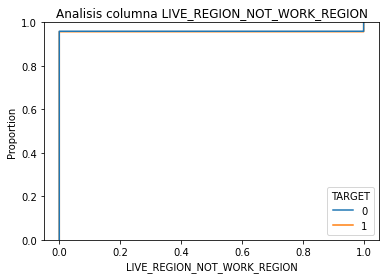

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.040494  0.197114  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.042538  0.201817  0.0  0.0  0.0  0.0  1.0


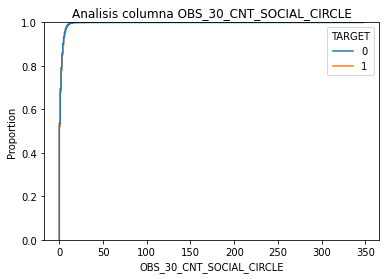

           count      mean       std  min  25%  50%  75%    max
TARGET                                                         
0       281701.0  1.415742  2.402858  0.0  0.0  0.0  2.0  348.0
1        24789.0  1.496147  2.378438  0.0  0.0  0.0  2.0   30.0


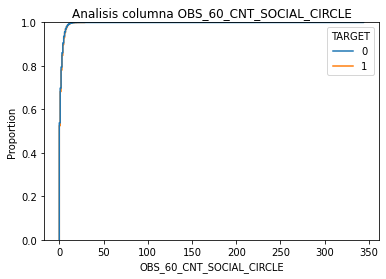

           count      mean       std  min  25%  50%  75%    max
TARGET                                                         
0       281701.0  1.398923  2.381793  0.0  0.0  0.0  2.0  344.0
1        24789.0  1.477672  2.355908  0.0  0.0  0.0  2.0   29.0


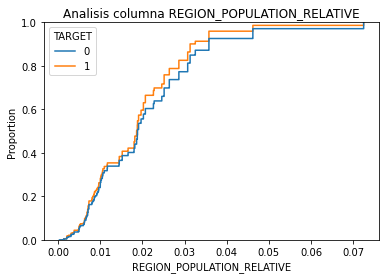

           count      mean       std       min       25%       50%       75%  \
TARGET                                                                         
0       282686.0  0.021021  0.013978  0.000290  0.010006  0.018850  0.028663   
1        24825.0  0.019131  0.011905  0.000533  0.009630  0.018634  0.025164   

             max  
TARGET            
0       0.072508  
1       0.072508  


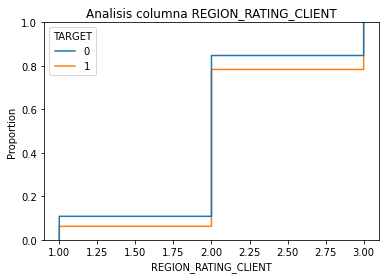

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  2.043578  0.508422  1.0  2.0  2.0  2.0  3.0
1        24825.0  2.153635  0.505052  1.0  2.0  2.0  2.0  3.0


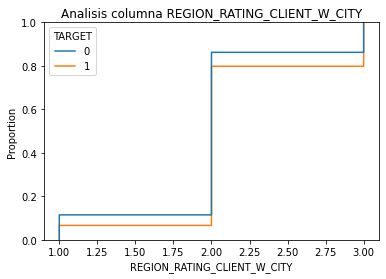

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  2.022449  0.501971  1.0  2.0  2.0  2.0  3.0
1        24825.0  2.134824  0.499909  1.0  2.0  2.0  2.0  3.0


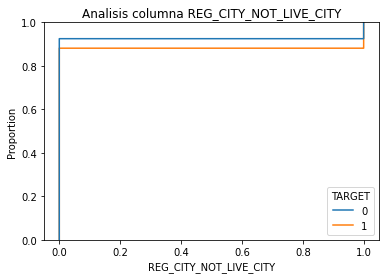

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.074641  0.262812  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.118389  0.323074  0.0  0.0  0.0  0.0  1.0


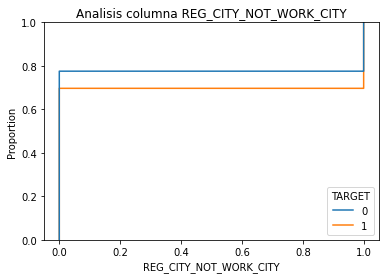

           count     mean       std  min  25%  50%  75%  max
TARGET                                                      
0       282686.0  0.22409  0.416982  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.30292  0.459530  0.0  0.0  0.0  1.0  1.0


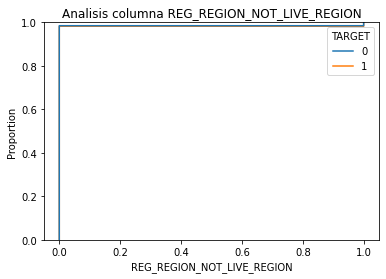

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.014942  0.121323  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.017442  0.130914  0.0  0.0  0.0  0.0  1.0


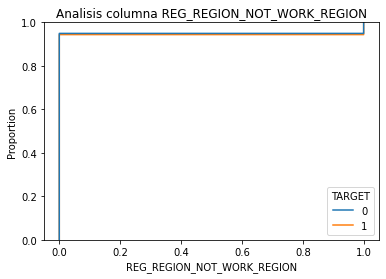

           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       282686.0  0.050317  0.218599  0.0  0.0  0.0  0.0  1.0
1        24825.0  0.055911  0.229755  0.0  0.0  0.0  0.0  1.0


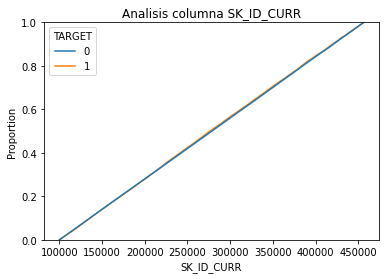

           count           mean            std       min        25%       50%  \
TARGET                                                                          
0       282686.0  278244.744536  102825.776954  100003.0  189103.25  278362.5   
1        24825.0  277449.167936  102383.123458  100002.0  189555.00  276291.0   

             75%       max  
TARGET                      
0       367241.5  456255.0  
1       366050.0  456254.0  


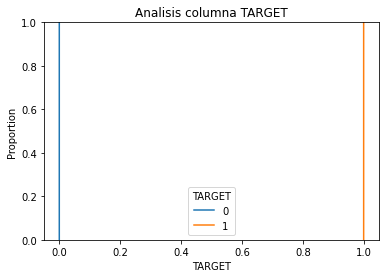

           count  mean  std  min  25%  50%  75%  max
TARGET                                              
0       282686.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        24825.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0


In [94]:
for c in numerical_columns.columns:
    sns.ecdfplot(data=df, x=c, hue="TARGET")
    plt.title(f"Analisis columna {c}")
    plt.show()
    print(df.groupby("TARGET")[c].describe())

- Las variables EXT_SOURCE paracen tener una distribucion comparable entre las personas que entran en default y las que no.
- Lo mismo sucede con DAYS BIRTH

## Analisis de correlacion

In [117]:
corr = numerical_columns.corr()
cmap =sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_PHONE,FLAG_WORK_PHONE,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET
AMT_ANNUITY,1.00,0.77,0.77,0.19,0.00,0.00,0.04,0.01,0.01,-0.01,0.02,0.08,0.01,-0.10,0.01,-0.06,0.04,-0.02,-0.02,0.13,0.03,0.02,-0.00,-0.00,0.00,0.03,0.04,0.02,0.01,0.00,-0.01,0.00,0.00,0.01,-0.02,0.10,0.00,-0.01,-0.07,-0.00,0.13,0.03,0.07,0.10,0.00,0.01,-0.02,0.05,0.01,0.07,-0.01,-0.01,0.12,-0.13,-0.14,-0.01,0.00,0.04,0.08,-0.00,-0.01
AMT_CREDIT,0.77,1.00,0.99,0.16,0.01,-0.00,0.06,0.02,0.00,-0.04,0.00,0.06,-0.06,-0.07,-0.01,-0.07,0.01,-0.02,-0.02,0.13,0.04,0.02,-0.00,0.03,0.00,0.05,0.05,0.03,0.06,0.01,0.03,0.02,0.01,0.03,-0.02,0.10,0.00,-0.01,-0.05,-0.00,0.08,0.02,0.02,0.07,0.00,0.03,-0.02,0.05,0.00,0.05,0.00,0.00,0.10,-0.10,-0.11,-0.03,-0.02,0.02,0.05,-0.00,-0.03
AMT_GOODS_PRICE,0.77,0.99,1.00,0.16,0.01,-0.00,0.06,0.02,0.00,-0.04,-0.00,0.06,-0.05,-0.06,-0.01,-0.08,0.01,-0.02,-0.02,0.14,0.04,0.02,-0.00,0.04,0.00,0.05,0.05,0.03,0.06,0.01,0.03,0.02,0.01,0.03,-0.01,0.08,0.00,-0.01,-0.05,-0.00,0.08,0.02,0.02,0.06,0.00,0.04,0.00,0.06,-0.00,0.05,0.00,0.00,0.10,-0.10,-0.11,-0.03,-0.02,0.03,0.05,-0.00,-0.04
AMT_INCOME_TOTAL,0.19,0.16,0.16,1.00,0.00,0.00,0.03,0.01,0.00,0.02,0.01,0.02,0.03,-0.06,0.01,-0.02,0.03,-0.01,-0.01,0.06,-0.03,-0.01,0.00,0.00,0.00,0.02,0.02,0.01,0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.02,0.00,0.00,-0.05,0.00,0.07,0.02,0.04,0.06,0.00,0.00,-0.02,0.04,0.01,0.06,-0.01,-0.01,0.07,-0.09,-0.09,0.00,0.01,0.03,0.06,-0.00,-0.00
AMT_REQ_CREDIT_BUREAU_DAY,0.00,0.01,0.01,0.00,1.00,0.23,-0.00,-0.00,0.22,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.01,-0.00,-0.00,0.00,0.01,0.01,0.01,0.00,0.01,-0.00,0.01,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
AMT_REQ_CREDIT_BUREAU_HOUR,0.00,-0.00,-0.00,0.00,0.23,1.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.02,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.01,-0.01,-0.00,-0.00,0.00,0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
AMT_REQ_CREDIT_BUREAU_MON,0.04,0.06,0.06,0.03,-0.00,0.00,1.00,0.01,-0.01,0.01,-0.01,-0.00,-0.00,-0.03,-0.02,-0.05,-0.01,0.00,-0.00,0.05,-0.01,0.00,0.00,-0.00,0.00,0.01,0.01,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.01,0.01,0.01,-0.02,-0.00,0.02,0.00,0.03,0.03,0.00,0.03,-0.00,0.04,-0.01,0.01,0.00,0.00,0.07,-0.06,-0.06,-0.01,-0.01,-0.00,0.01,0.00,-0.01
AMT_REQ_CREDIT_BUREAU_QRT,0.01,0.02,0.02,0.01,-0.00,0.00,0.01,1.00,-0.01,0.10,-0.00,-0.00,-0.02,0.01,-0.02,-0.01,-0.00,-0.00,-0.00,0.00,-0.02,0.01,0.00,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.01,0.00,-0.00,0.01,-0.00,-0.00,-0.00,0.01,-0.01,0.00,-0.01,-0.02,0.00,-0.01,-0.01,0.01,0.01,-0.00,0.01,0.01,-0.00,-0.01,-0.00,-0.01,0.00,-0.01
AMT_REQ_CREDIT_BUREAU_WEEK,0.01,0.00,0.00,0.00,0.22,0.

In [124]:
## Tomar los pares de variables mayormente correlacionados
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(numerical_columns, 15))

Top Absolute Correlations
DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999755
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998491
AMT_CREDIT                   AMT_GOODS_PRICE                0.986734
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950842
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.879160
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860627
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.860556
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.825575
AMT_ANNUITY                  AMT_GOODS_PRICE                0.774837
                             AMT_CREDIT                     0.770127
DAYS_BIRTH                   FLAG_EMP_PHONE                 0.619888
                             DAYS_EMPLOYED                  0.615864
FLAG_DOCUMENT_6              FLAG_EMP_PHONE                 0.597732
DAYS_EMPLOYED                FLAG_DOCUMENT_6                0.597484
REGION_P

- Existen variables predictoras que tienen correlacion entre ellas una opcion para descartar variables que generen multicolinealidad (aunque normalmente los modelos no lineales no se ven afectados fuertemente por este problema)

## Agregar mas variables 

In [135]:
## Utilizaremos la tabla installments_payments para agregar mas info sobre la persona que solicito el prestamo
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [136]:
installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,13605401.000,13605401.000,13605401.000,13605401.000,13605401.000,13602496.000,13605401.000,13602496.000
mean,1903364.970,278444.882,0.857,18.871,-1042.270,-1051.114,17050.907,17238.223
std,536202.906,102718.310,1.035,26.664,800.946,800.586,50570.254,54735.784
min,1000001.000,100001.000,0.000,1.000,-2922.000,-4921.000,0.000,0.000
25%,1434191.000,189639.000,0.000,4.000,-1654.000,-1662.000,4226.085,3398.265
50%,1896520.000,278685.000,1.000,8.000,-818.000,-827.000,8884.080,8125.515
75%,2369094.000,367530.000,1.000,19.000,-361.000,-370.000,16710.210,16108.425
max,2843499.000,456255.000,178.000,277.000,-1.000,-1.000,3771487.845,3771487.845


In [138]:
## Aqui podemos ver los prestamos que tomaron anteriormente
installments_payments.groupby("SK_ID_CURR")["SK_ID_PREV"].count().sort_values(ascending=False)

SK_ID_CURR
145728    372
296205    350
453103    347
189699    344
186851    337
         ... 
432272      1
187751      1
235895      1
412040      1
455483      1
Name: SK_ID_PREV, Length: 339587, dtype: int64

In [139]:
### Podremos generar un dataset con agregaciones para cada SK_ID_CURR 
agg = {"SK_ID_PREV":"count",
        "NUM_INSTALMENT_NUMBER":["mean","min","max","sum",np.std],
        "DAYS_INSTALMENT":["mean","min","max","sum",np.std],
        "DAYS_ENTRY_PAYMENT":["mean","min","max","sum",np.std],
        "AMT_INSTALMENT":["mean","min","max","sum",np.std],
       "AMT_PAYMENT":["mean","min","max","sum",np.std]
      }

gi = installments_payments.groupby("SK_ID_CURR").agg(agg)

In [140]:
gi.head()

SK_ID_PREV NUM_INSTALMENT_NUMBER                     \
                count                  mean min max  sum   std   
SK_ID_CURR                                                       
100001              7                 2.714   1   4   19 1.113   
100002             19                10.000   1  19  190 5.627   
100003             25                 5.080   1  12  127 3.135   
100004              3                 2.000   1   3    6 1.000   
100005              9                 5.000   1   9   45 2.739   

           DAYS_INSTALMENT                                         \
                      mean       min       max        sum     std   
SK_ID_CURR                                                          
100001           -2187.714 -2916.000 -1619.000 -15314.000 653.990   
100002            -295.000  -565.000   -25.000  -5605.000 168.819   
100003           -1378.160 -2310.000  -536.000 -34454.000 757.454   
100004            -754.000  -784.000  -724.000  -2262.000  30.000   
100005            -586.000  -706.000  -466.000  -5274.000  82.158   

           DAYS_ENTRY_PAYMENT                                         \
                         mean       min       max        sum     std   
SK_ID_CURR                                                             
100001              -2195.000 -2916.000 -1628.000 -15365.000 643.904   
100002               -315.421  -587.000   -49.000  -5993.000 172.059   
100003              -1385.320 -2324.000  -544.000 -34633.000 757.325   
100004               -761.667  -795.000  -727.000  -2285.000  34.020   
100005               -609.556  -736.000  -470.000  -5486.000  90.554   

           AMT_INSTALMENT                                             \
                     mean      min        max         sum        std   
SK_ID_CURR                                                             
100001           5885.132 3951.000  17397.900   41195.925   5076.677   
100002          11559.247 9251.775  53093.745  219625.695  10058.038   
100003          64754.586 6662.970 560835.360 1618864.650 110542.592   
100004           7096.155 5357.250  10573.965   21288.465   3011.872   
100005           6240.205 4813.200  17656.245   56161.845   4281.015   

           AMT_PAYMENT                                             
                  mean      min        max         sum        std  
SK_ID_CURR                                                         
100001        5885.132 3951.000  17397.900   41195.925   5076.677  
100002       11559.247 9251.775  53093.745  219625.695  10058.038  
100003       64754.586 6662.970 560835.360 1618864.650 110542.592  
100004        7096.155 5357.250  10573.965   21288.465   3011.872  
100005        6240.205 4813.200  17656.245   56161.845   4281.015

In [142]:
gi["SK_ID_CURR"] = gi.index
columns_name = [str(i)+"_"+str(j) for i,j in gi.columns ]
gi.columns = columns_name

,SK_ID_PREV_count,NUM_INSTALMENT_NUMBER_mean,NUM_INSTALMENT_NUMBER_min,NUM_INSTALMENT_NUMBER_max,NUM_INSTALMENT_NUMBER_sum,NUM_INSTALMENT_NUMBER_std,DAYS_INSTALMENT_mean,DAYS_INSTALMENT_min,DAYS_INSTALMENT_max,DAYS_INSTALMENT_sum,DAYS_INSTALMENT_std,DAYS_ENTRY_PAYMENT_mean,DAYS_ENTRY_PAYMENT_min,DAYS_ENTRY_PAYMENT_max,DAYS_ENTRY_PAYMENT_sum,DAYS_ENTRY_PAYMENT_std,AMT_INSTALMENT_mean,AMT_INSTALMENT_min,AMT_INSTALMENT_max,AMT_INSTALMENT_sum,AMT_INSTALMENT_std,AMT_PAYMENT_mean,AMT_PAYMENT_min,AMT_PAYMENT_max,AMT_PAYMENT_sum,AMT_PAYMENT_std,SK_ID_CURR_
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,7,2.714,1,4,19,1.113,-2187.714,-2916.000,-1619.000,-15314.000,653.990,-2195.000,-2916.000,-1628.000,-15365.000,643.904,5885.132,3951.000,17397.900,41195.925,5076.677,5885.132,3951.000,17397.900,41195.925,5076.677,100001
100002,19,10.000,1,19,190,5.627,-295.000,-565.000,-25.000,-5605.000,168.819,-315.421,-587.000,-49.000,-5993.000,172.059,11559.247,9251.775,53093.745,219625.695,10058.038,11559.247,9251.775,53093.745,219625.695,10058.038,100002
100003,25,5.080,1,12,127,3.135,-1378.160,-2310.000,-536.000,-34454.000,757.454,-1385.320,-2324.000,-544.000,-34633.000,757.325,64754.586,6662.970,560835.360,1618864.650,110542.592,64754.586,6662.970,560835.360,1618864.650,110542.592,100003
100004,3,2.000,1,3,6,1.000,-754.000,-784.000,-724.000,-2262.000,30.000,-761.667,-795.000,-727.000,-2285.000,34.020,7096.155,5357.250,10573.965,21288.465,3011.872,7096.155,5357.250,10573.965,21288.465,3011.872,100004
100005,9,5.000,1,9,45,2.739,-586.000,-706.000,-466.000,-5274.000,82.158,-609.556,-736.000,-470.000,-5486.000,90.554,6240.205,4813.200,17656.245,56161.845,4281.015,6240.205,4813.200,17656.245,56161.845,4281.015,100005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,7,4.000,1,7,28,2.160,-120.000,-210.000,-30.000,-840.000,64.807,-156.286,-237.000,-38.000,-1094.000,70.486,7492.924,6605.910,12815.010,52450.470,2346.819,7492.924,6605.910,12815.010,52450.470,2346.819,456251
456252,6,3.500,1,6,21,1.871,-2391.000,-2466.000,-2316.000,-14346.000,56.125,-2393.833,-2470.000,-2327.000,-14363.000,53.537,10069.868,10046.880,10074.465,60419.205,11.262,10069.868,10046.880,10074.465,60419.205,11.262,456252
456253,14,4.786,1,12,67,3.662,-2372.929,-2915.000,-1716.000,-33221.000,526.630,-2387.429,-2915.000,-1738.000,-33424.000,518.376,4399.708,2754.450,5575.185,61595.910,1145.447,4115.915,27.270,5575.185,57622.815,1638.229,456253


In [143]:
#gi.to_csv("data/installments_payments_agg.csv",index=False)